<a href="https://colab.research.google.com/github/GotinhaJr/TrabalhoGarcia/blob/main/Trab_Garcia_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
c = wine_quality.data.original.color
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [3]:
wine_quality.data.original

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["colors"] = c
print(X_scaled_df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol colors  
0 -0.915464    red  
1 -0.580068   

In [5]:
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,colors
3761,2.070989,0.913197,-0.609973,-0.639680,0.883966,-0.649386,-0.013174,0.034473,-2.789621,-0.613385,-0.915464,white
3740,0.373895,-0.362438,0.215866,2.071864,-0.000967,0.026746,0.022213,1.702006,0.320319,-0.210144,-0.747766,white
1359,3.382379,0.822080,0.559966,-0.849877,0.998151,-1.381861,-1.552520,0.781528,-0.923657,0.797958,-0.384420,red
1230,0.373895,-0.969884,0.147046,-0.576620,0.284496,-0.874763,-1.021711,0.001123,0.942306,1.671647,1.096912,red
4751,0.296754,-0.544672,6.272023,-0.177246,-0.600437,1.153631,3.153986,-1.506327,-1.172452,-0.680592,2.186949,white
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.296754,-0.119460,1.798725,2.376650,-0.172244,0.702877,0.836120,1.735356,-0.426067,0.058683,-1.083162,white
5191,-1.246058,-0.362438,-0.334694,-0.324384,-0.372068,1.209975,0.747652,-0.892675,0.817909,-0.613385,0.174573,white
5226,-0.628933,0.184263,-0.816433,0.032951,1.740353,1.717074,1.189993,-0.035563,0.133722,-0.680592,-0.831615,white
5390,-0.551792,-0.483928,1.248165,0.537425,-0.143698,0.871910,1.437704,0.221237,-0.239471,-0.411765,-0.831615,white


In [7]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,colors
3103,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308,white
1419,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219,red
4761,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610,white
4690,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615,white
4032,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709,white
...,...,...,...,...,...,...,...,...,...,...,...,...
4294,-1.168917,-0.666161,-0.265874,0.884250,-0.885900,-0.254976,0.092988,-0.732592,0.382517,-1.016626,0.677667,white
3757,0.142473,-0.969884,-0.334694,-0.870896,-0.229336,-0.254976,-0.190111,-0.232332,1.875288,0.865165,0.090724,white
5954,-0.628933,-0.180205,-0.265874,-0.618660,-0.486252,0.195778,0.376086,-1.746451,0.009325,-1.016626,1.851553,white
4418,-0.937495,-0.787650,0.147046,-0.723758,-0.400614,1.829762,0.128375,-1.392935,1.377698,-0.747799,0.761516,white


In [8]:
y_train.quality.values

array([6, 5, 6, ..., 5, 5, 5])

In [9]:
df = X_train
fixed_acidity_train = df['fixed_acidity'].values
volatile_acidity_train = df['volatile_acidity'].values
citric_acid_train = df['citric_acid'].values
residual_sugar_train = df['residual_sugar'].values
chlorides_train = df['chlorides'].values
free_sulfur_dioxide_train = df['free_sulfur_dioxide'].values
total_sulfur_dioxide_train = df['total_sulfur_dioxide'].values
density_train = df['density'].values
pH_train = df['pH'].values
sulphates_train = df['sulphates'].values
alcohol_train = df['alcohol'].values
colors_train = df['colors'].values

In [10]:
coords = {"colors":np.unique(colors_train)}
colors_idx = pd.Categorical(colors_train, categories=['red', 'white']).codes
with pm.Model(coords=coords) as regression_h_2:
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0][colors_idx] * fixed_acidity_train +
                betas[1][colors_idx] * volatile_acidity_train +
                betas[2][colors_idx] * citric_acid_train +
                betas[3][colors_idx] * residual_sugar_train +
                betas[4][colors_idx] * chlorides_train +
                betas[5][colors_idx] * free_sulfur_dioxide_train +
                betas[6][colors_idx] * total_sulfur_dioxide_train +
                betas[7][colors_idx] * density_train +
                betas[8][colors_idx] * pH_train +
                betas[9][colors_idx] * sulphates_train +
                betas[10][colors_idx] * alcohol_train)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

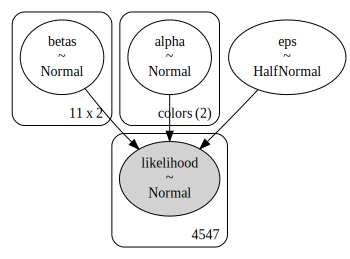

In [11]:
pm.model_to_graphviz(regression_h_2)

In [12]:
with regression_h_2:
  trace_reg_h_2 = pm.sample()
pm.summary(trace_reg_h_2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.080,0.044,-0.003,0.166,0.001,0.001,1311.0,1125.0,1.0
"betas[0, 1]",0.080,0.032,0.026,0.144,0.001,0.001,1189.0,1253.0,1.0
"betas[1, 0]",-0.197,0.028,-0.246,-0.142,0.001,0.000,1818.0,1228.0,1.0
"betas[1, 1]",-0.308,0.023,-0.350,-0.267,0.000,0.000,2405.0,1583.0,1.0
"betas[2, 0]",-0.053,0.030,-0.104,0.007,0.001,0.001,1793.0,1456.0,1.0
"betas[2, 1]",-0.001,0.016,-0.031,0.029,0.000,0.000,2719.0,1385.0,1.0
"betas[3, 0]",0.132,0.097,-0.064,0.305,0.002,0.002,1674.0,1429.0,1.0
"betas[3, 1]",0.355,0.042,0.277,0.432,0.001,0.001,1000.0,1174.0,1.0
"betas[4, 0]",-0.029,0.021,-0.066,0.013,0.000,0.000,2240.0,1239.0,1.0
"betas[4, 1]",-0.009,0.022,-0.051,0.032,0.000,0.000,2455.0,1636.0,1.0


In [13]:
with regression_h_2:
    trace_reg_post_h_2 = pm.sample_posterior_predictive(trace_reg_h_2)

In [14]:
with regression_h_2:
    pm.compute_log_likelihood(trace_reg_h_2)

In [15]:
with pm.Model() as robusta:
  betas = pm.Normal("betas",0,1,shape = 11)
  alpha = pm.Normal("alpha",0,1,)
  eps = pm.HalfNormal("eps",1)

  df = pm.Exponential("df",1)

  mu = alpha + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                betas[7] * density_train +
                betas[8] * pH_train +
                betas[9] * sulphates_train +
                betas[10] * alcohol_train)

  likelihood = pm.StudentT("likelihood",nu=df,mu=mu,sigma=eps,observed=y_train.quality.values)

In [16]:
with robusta:
  trace_priori_robusta = pm.sample_prior_predictive()

In [17]:
with robusta:
  trace_robusta = pm.sample()

pm.summary(trace_robusta)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.108,0.022,0.066,0.149,0.001,0.001,930.0,1464.0,1.0
betas[1],-0.216,0.015,-0.244,-0.189,0.000,0.000,1702.0,1548.0,1.0
betas[2],-0.017,0.013,-0.042,0.006,0.000,0.000,2035.0,1527.0,1.0
betas[3],0.229,0.028,0.176,0.279,0.001,0.001,964.0,989.0,1.0
betas[4],-0.004,0.014,-0.032,0.021,0.000,0.000,2024.0,1379.0,1.0
betas[5],0.125,0.016,0.094,0.157,0.000,0.000,2248.0,1546.0,1.0
betas[6],-0.157,0.019,-0.192,-0.123,0.000,0.000,2388.0,1668.0,1.0
betas[7],-0.198,0.041,-0.273,-0.125,0.001,0.001,911.0,1164.0,1.0
betas[8],0.081,0.016,0.053,0.113,0.000,0.000,1126.0,1492.0,1.0
betas[9],0.122,0.013,0.098,0.148,0.000,0.000,2062.0,1675.0,1.0


In [18]:
with robusta:
    trace_robusta_post = pm.sample_posterior_predictive(trace_robusta)

In [19]:
with robusta:
  pm.compute_log_likelihood(trace_robusta)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

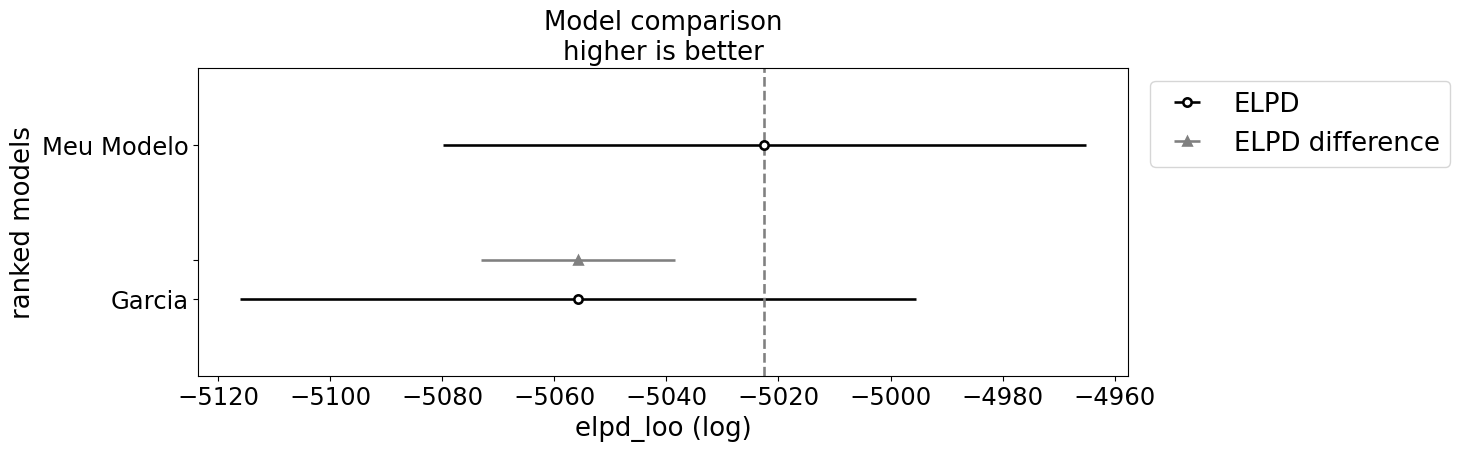

In [20]:
model_compare = az.compare(
    {
        "Meu Modelo": trace_robusta,

        "Garcia": trace_reg_h_2

    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [21]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Meu Modelo,0,-5022.550575,14.248739,0.00000,0.979081,57.403804,0.000000,False,log
Garcia,1,-5055.780655,29.070388,33.23008,0.020919,60.285020,17.344832,True,log


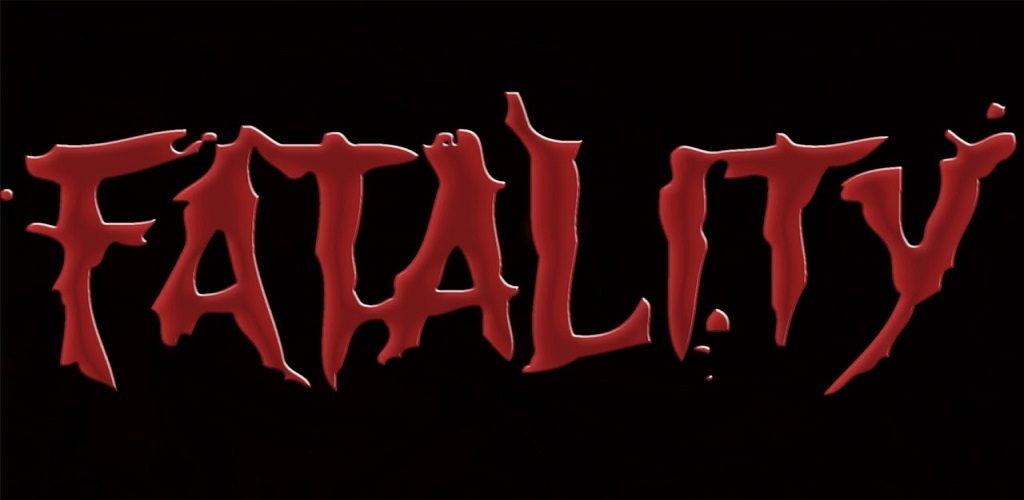